Open keywords data:

In [2]:
def read_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
    return lines

keywords_list = read_file_to_list('20qs-data/keywords.txt')
keywords_list = keywords_list[1:]
print(f"Number of keywords in data: {len(keywords_list)}")

Number of keywords in data: 2046


Read current keyword labels and results:

In [3]:
import json

def read_jsonl_and_transform(file_path):
    result_dict = {}

    with open(file_path, 'r') as file:
        for line in file:
            record = json.loads(line)
            keyword = record.pop('keyword')
            result_dict[keyword] = record

    return result_dict

def read_json_to_dict(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

keyword_labels, results = read_jsonl_and_transform('20qs-data/labeled_keywords_v2.jsonl'), read_json_to_dict('20qs-data/labeling_results_v2.jsonl')

In [25]:
%%capture
!pip install --upgrade upsetplot matplotlib seaborn

In [4]:
import pandas as pd
import numpy as np

def make_list_from_dict(original_dict, place = False):
    list_of_dicts = []
    for key, sub_dict in original_dict.items():
        if not place and sub_dict['place'] == 'yes':
            continue
        if place and sub_dict['place'] == 'no':
            continue
        # Create a new dictionary that includes the key from the original dict
        new_dict = {"keyword": key}
        # Update the new dictionary with the key-value pairs from the sub-dictionary
        new_dict.update(sub_dict)
        # Append the new dictionary to the list
        list_of_dicts.append(new_dict)
    return list_of_dicts

labeled_things_list = make_list_from_dict(keyword_labels, place = False)
labeled_places_list = make_list_from_dict(keyword_labels, place = True)

things_df = pd.DataFrame(labeled_things_list)
places_df = pd.DataFrame(labeled_places_list)


## Things Data Analysis

In [5]:
things_df.set_index('keyword', inplace = True)
things_df.drop(columns = ['place'], inplace = True)
things_df = things_df.replace({'yes': 1, 'no': 0})
things_df.head(10)

,food,beverage,living,plant,animal,electronics,furniture,"transportation, vehicles",man-made,"architecture, construction",...,"industry, manufacturing",agriculture,"arts, media",safety,medicine,"clothing, accessories, beauty","sports, entertainment","food, beverage, cooking",handheld,indoors
keyword,,,,,,,,,,,,,,,,,,,,,
acacia,1,0,1,1,0,0,1,0,0,0,...,1,1,0,0,1,0,0,1,1,1
accent chair,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
acorn,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
adhd medication,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
adjustable bench,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
Advertisement,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,1,1,1
aerator,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,1,1
Agave,1,1,1,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,1,1
agave plant,1,0,1,1,0,0,0,0,0,0,...,1,1,0,0,1,1,0,1,1,1


In [6]:
has_nan = things_df.isna().any().any()
print(has_nan)

False


In [7]:
things_df.describe()

,food,beverage,living,plant,animal,electronics,furniture,"transportation, vehicles",man-made,"architecture, construction",...,"industry, manufacturing",agriculture,"arts, media",safety,medicine,"clothing, accessories, beauty","sports, entertainment","food, beverage, cooking",handheld,indoors
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,...,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,0.177431,0.034150,0.141797,0.097253,0.054195,0.239050,0.053452,0.125464,0.792131,0.178916,...,0.522643,0.412769,0.346696,0.246474,0.208612,0.184855,0.208612,0.304380,0.698589,0.841128
std,0.382175,0.181682,0.348971,0.296412,0.226485,0.426662,0.225017,0.331367,0.405934,0.383424,...,0.499673,0.492515,0.476095,0.431118,0.406467,0.388324,0.406467,0.460315,0.459041,0.365692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 5000x3000 with 0 Axes>

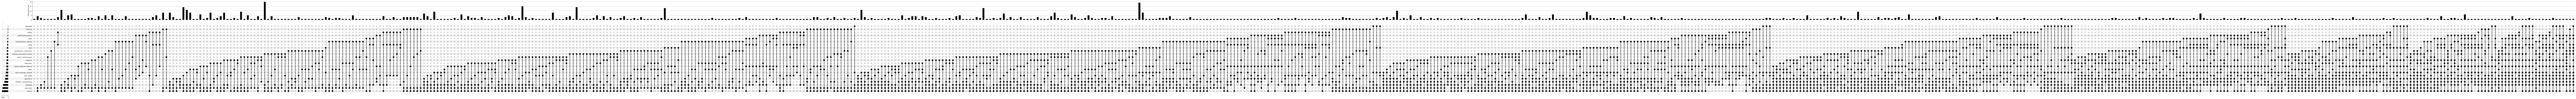

In [8]:
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_memberships

def create_upset_plot(df, figsize=(50, 30)):
    # Step 1: Aggregate duplicate rows
    grouped_df = df.groupby(list(df.columns)).size().reset_index(name='counts')
    
    # Step 2: Create a list of memberships (feature combinations) and their counts
    memberships = []
    counts = []
    for row in grouped_df.itertuples(index=False):
        combination = [col for col, val in zip(grouped_df.columns[:-1], row[:-1]) if val]
        memberships.append(combination)
        counts.append(row.counts)
    
    # Step 3: Convert to UpSet format
    upset_data = from_memberships(memberships, data=counts)
    
    # Step 4: Create and plot the UpSet plot
    plt.figure(figsize = figsize)
    upset = UpSet(upset_data)
    upset.plot()
    plt.show()
    
create_upset_plot(things_df)

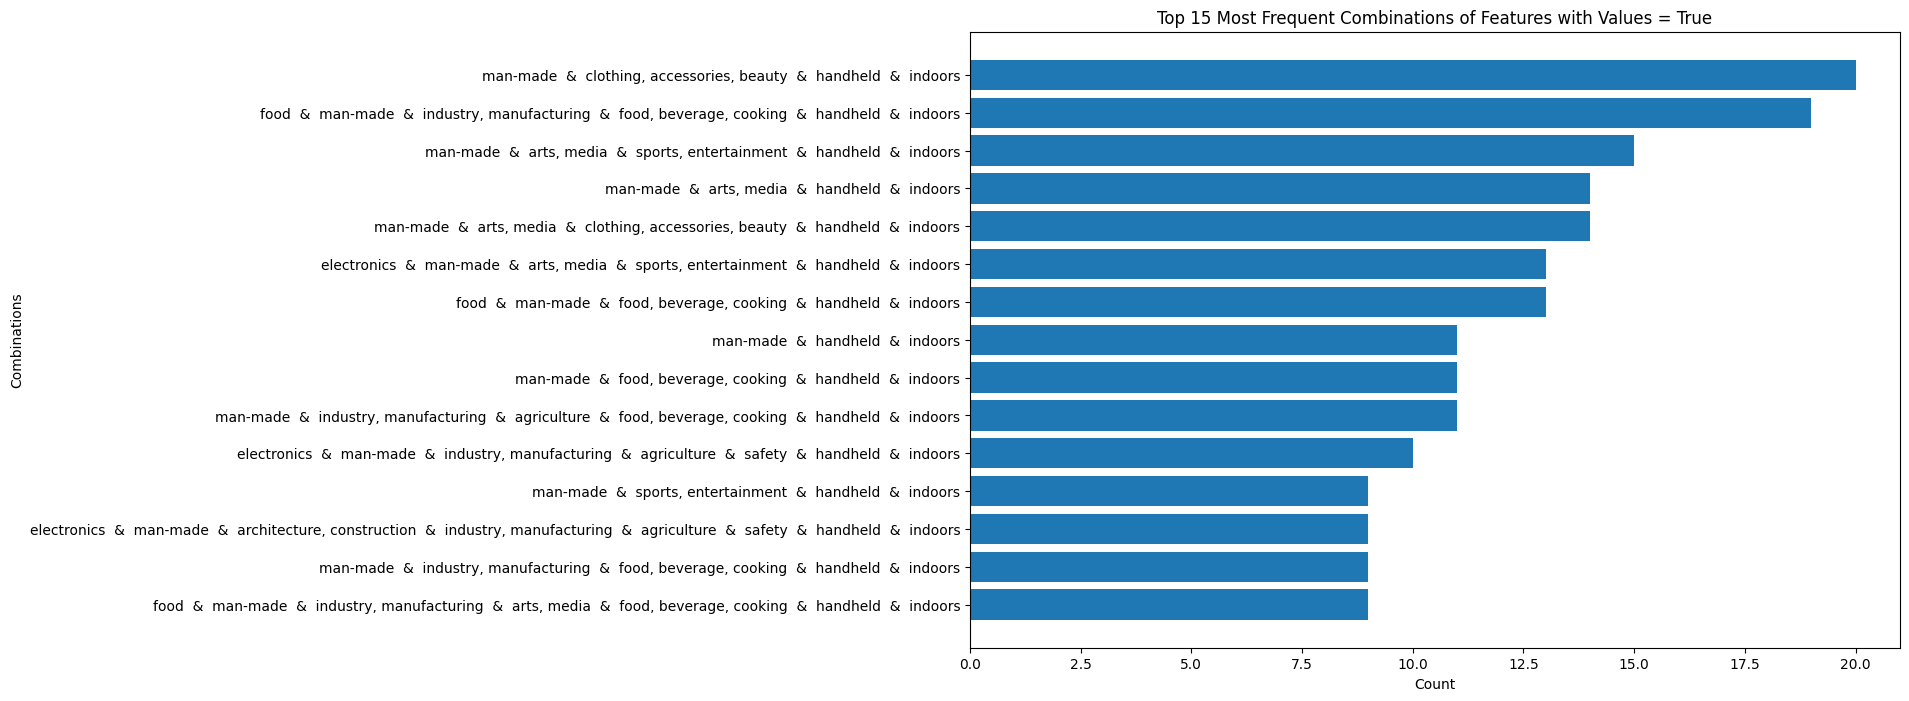

In [8]:
from itertools import combinations

def top_k_frequent_combinations(df, features, k=10):
    # Create a mask for rows where features are True
    mask = df[features].astype(bool)
    
    # Initialize a dictionary to count the combinations
    combination_counts = {}
    
    # Iterate over each row in the DataFrame
    for index, row in mask.iterrows():
        true_features = tuple(row[row].index)
        if true_features:
            if true_features in combination_counts:
                combination_counts[true_features] += 1
            else:
                combination_counts[true_features] = 1
    
    # Convert the dictionary to a DataFrame
    combination_df = pd.DataFrame(
        list(combination_counts.items()), columns=['Combination', 'Count']
    )
    
    # Sort the DataFrame by count in descending order
    combination_df = combination_df.sort_values(by='Count', ascending=False)
    
    # Get the top k combinations
    top_k_combinations = combination_df.head(k)
    
    # Plotting the histogram
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_k_combinations)), top_k_combinations['Count'])
    plt.yticks(range(len(top_k_combinations)), ['  &  '.join(comb) for comb in top_k_combinations['Combination']])
    plt.xlabel('Count')
    plt.ylabel('Combinations')
    plt.title(f'Top {k} Most Frequent Combinations of Features with Values = True')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    plt.show()
    
top_k_frequent_combinations(things_df, things_df.columns, k = 15)

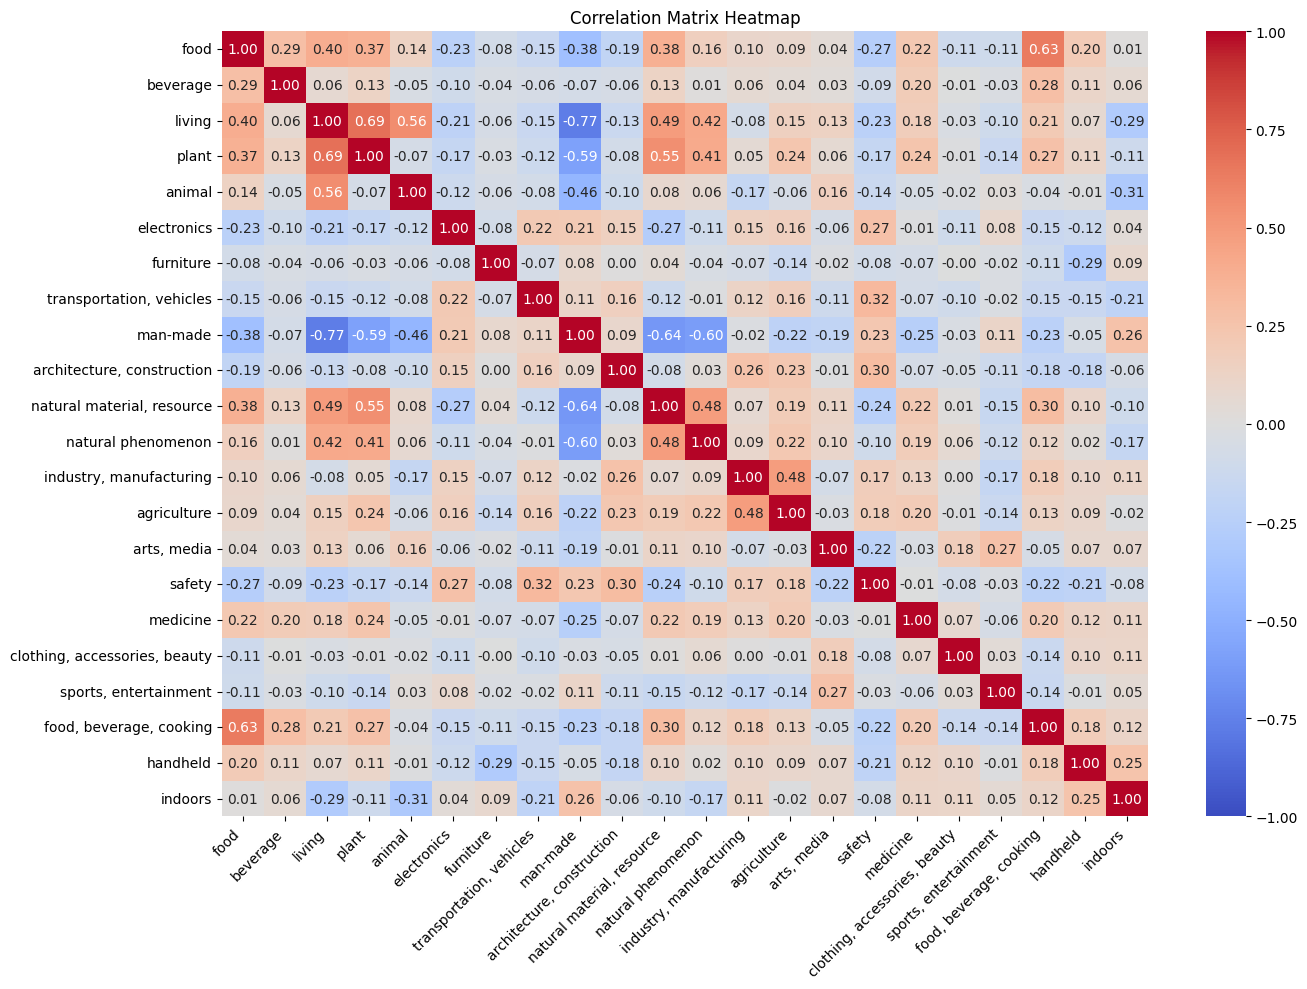

In [9]:
import seaborn as sns

corr_matrix_things = things_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_things, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Places Data Analysis
Out of use as of the last competition update.

In [15]:
places_df.set_index('keyword', inplace = True)
places_df.drop(columns = ['place'], inplace = True)
places_df = places_df.replace({'yes': 1, 'no': 0})
places_df.head(10)

,country,city,capital,landlocked,coast,geological feature,africa,asia,europe,hemisphere,oceania,europe or asia,americas,north america,man-made landmark,natural landmark,equator,body of water,biome,building
keyword,,,,,,,,,,,,,,,,,,,,
acapulco mexico,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
aconcagua,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
adelaide australia,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
afghanistan,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
airport,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1
albania,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
algeria,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
algiers algeria,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
alley,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0


In [17]:
has_nan = places_df.isna().any().any()
print(has_nan)

False


In [18]:
places_df.describe()

,country,city,capital,landlocked,coast,geological feature,africa,asia,europe,hemisphere,oceania,europe or asia,americas,north america,man-made landmark,natural landmark,equator,body of water,biome,building
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.277539,0.439199,0.193133,0.090129,0.423462,0.094421,0.217454,0.339056,0.380544,0.346209,0.098712,0.569385,0.399142,0.337625,0.439199,0.145923,0.773963,0.028612,0.011445,0.071531
std,0.448105,0.496645,0.395039,0.286571,0.494461,0.292622,0.412809,0.473728,0.485868,0.476101,0.298489,0.495517,0.490073,0.473239,0.496645,0.353282,0.418563,0.166834,0.106443,0.257894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


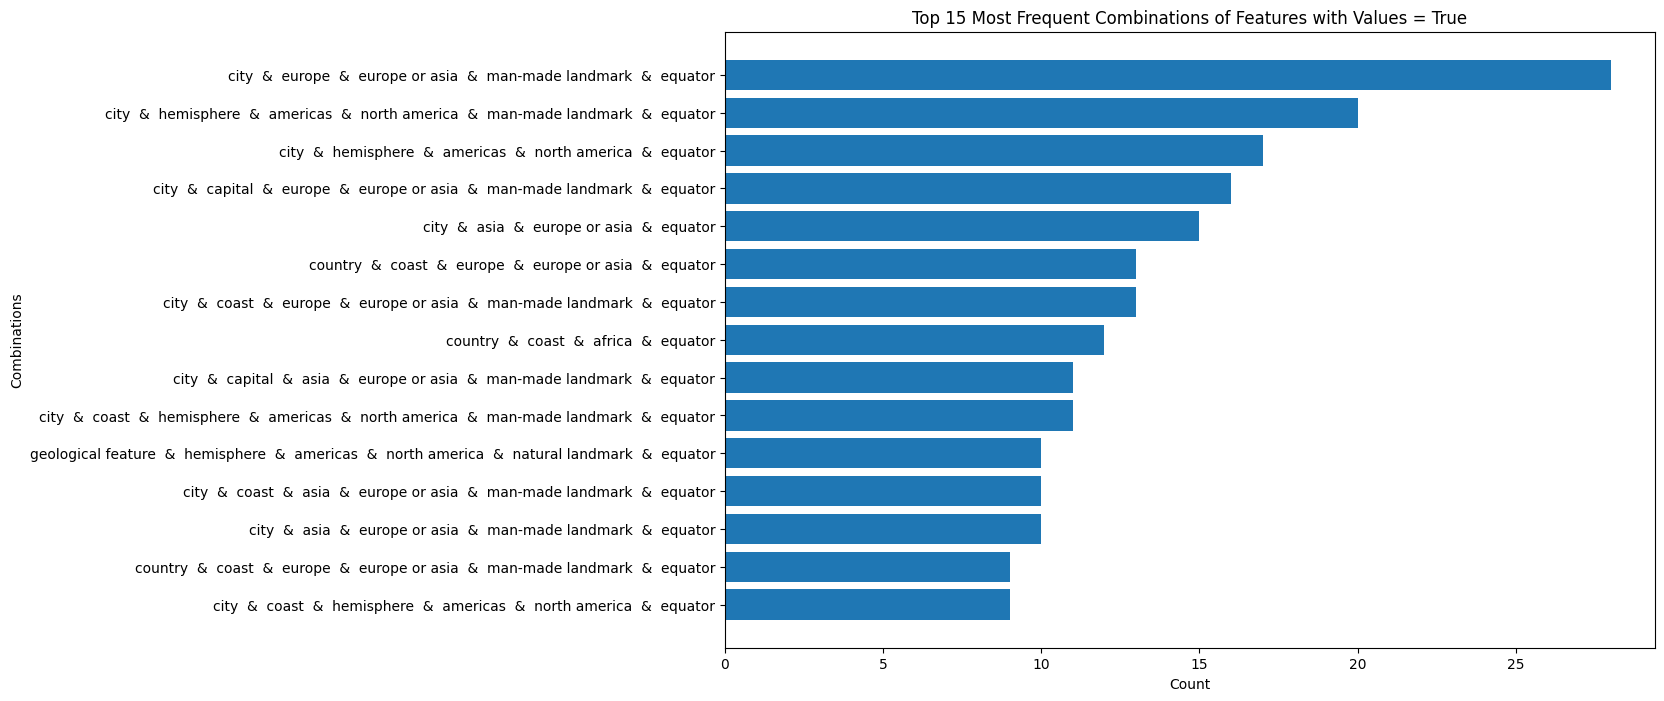

In [19]:
top_k_frequent_combinations(places_df, places_df.columns, k = 15)

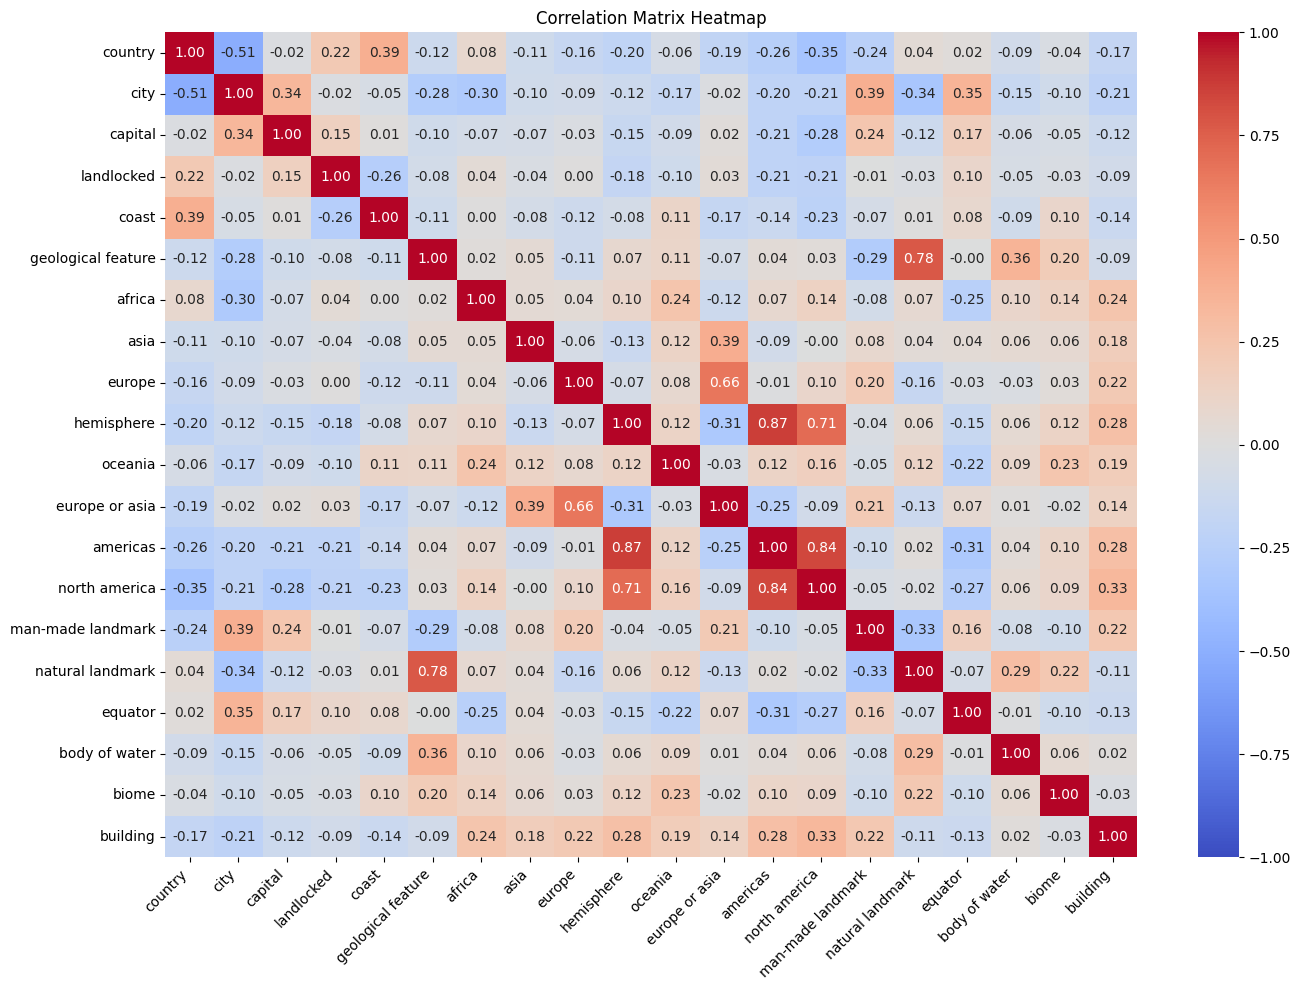

In [22]:
import seaborn as sns

corr_matrix_places = places_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_places, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Optimal Game Path with Monte Carlo Simulation

In [9]:
import math
from tqdm import tqdm
import pickle

class MonteCarloNode:
    def __init__(self, queries, answers, depth, size, data_size, yes_branch = None, no_branch = None):
        self.queries = queries
        self.answers = answers
        self.depth = depth
        self.size = size
        self.data_size = data_size
        self.yes_branch = yes_branch
        self.no_branch = no_branch
    
    def getCurrentData(self, data):
        curr_data = data
        for (query, answer) in zip(self.queries, self.answers):
            curr_data = curr_data[curr_data[query] == answer]
        return curr_data
    
    def isTerminal(self, data, min_percent_reduction = 0.15, max_percent_subset = 0.05):
        queries_left = [query for query in data.columns if query not in self.queries]
        if not queries_left:
            print(f"Terminal leaf at depth {self.depth}. No queries left.")
        curr_data = self.getCurrentData(data)
        if curr_data.empty or len(curr_data) < max_percent_subset * len(data):
            print(f"Terminal leaf at depth {self.depth}. Min subset size reached.")
            return True
        for query in queries_left:
            yes_data = curr_data[curr_data[query] == 1]
            no_data = curr_data[curr_data[query] == 0]
            if yes_data.empty or no_data.empty: continue
            reduction_size = min(len(yes_data), len(no_data))
            if reduction_size > min_percent_reduction*len(curr_data):
                return False
        print(f"Terminal leaf at depth {self.depth}. No significant queries left.")
        return True
    
    def MonteCarloSimulation(self, data, n_iter, min_percent_reduction = 0.15, max_percent_subset = 0.05):
        queries_left = [query for query in data.columns if query not in self.queries]
        start_data = self.getCurrentData(data)
        queries_count = {query: 0 for query in queries_left}
        queries_total_gain = {query: 0 for query in queries_left}
        
        for _ in tqdm(range(n_iter*len(start_data)), desc = f'MC simulation at node of depth {self.depth}'):
            curr_data = start_data
            row = start_data.sample(1).iloc[0]
            random_queries = list(np.random.permutation(queries_left))
            start = True
            n_turns = 0
            
            while random_queries:
                curr_query = random_queries.pop()
                next_data = curr_data[curr_data[curr_query] == row[curr_query]]
                next_data_complement = curr_data[curr_data[curr_query] != row[curr_query]] 
                if next_data.empty or next_data_complement.empty:
                    continue
                reduction_size = min(len(next_data), len(next_data_complement))
                if reduction_size < min_percent_reduction*len(curr_data): 
                    continue
                curr_data = next_data
                if start: 
                    first_query = curr_query
                    start = False
                n_turns += 1
                if curr_data.empty or len(curr_data) < max_percent_subset*self.data_size:
                    break
            
            if n_turns > 0:
                information_gain = - math.log2(len(curr_data)/len(start_data))/n_turns if not curr_data.empty else - math.log2(max_percent_subset*self.data_size/len(start_data))/n_turns
                queries_count[first_query] += 1
                queries_total_gain[first_query] += information_gain
        
        queries_avg_gain = sorted([(query, queries_total_gain[query]/queries_count[query]) for query in queries_left if queries_count[query] > 0],
                                  key = lambda x: x[1],
                                  reverse = True)
        if queries_avg_gain == []:
            return None
        else:
            #print("Top 3 queries:")
            #for i in range(min(3, len(queries_avg_gain))):
            #    query, avg_gain = queries_avg_gain[i]
            #    print(f"Query: {query}. Average information gain: {avg_gain:.2f}")
            return queries_avg_gain[0][0]
    
    def addChildNodes(self, data, n_iter, min_percent_reduction = 0.15, max_percent_subset = 0.05):
        if self.isTerminal(data, min_percent_reduction = 0.15, max_percent_subset = 0.05):
            return 1
        curr_data = self.getCurrentData(data)
        next_query = self.MonteCarloSimulation(data, n_iter=n_iter, min_percent_reduction=min_percent_reduction, max_percent_subset=max_percent_subset)
        if next_query == None: 
            print(f"Terminal leaf at depth {self.depth}. No significant queries left.")
            return 1
        len_yes_data = len(curr_data[curr_data[next_query] == 1]) if not curr_data[curr_data[next_query] == 1].empty else 0
        len_no_data = len(curr_data[curr_data[next_query] == 0]) if not curr_data[curr_data[next_query] == 0].empty else 0
        yes_branch = MonteCarloNode(queries = self.queries + [next_query], answers = self.answers + [1], depth = self.depth+1, size = len_yes_data, data_size = self.data_size)
        no_branch = MonteCarloNode(queries = self.queries + [next_query], answers = self.answers + [0], depth = self.depth+1, size = len_no_data, data_size = self.data_size)
        print(f"Added branches at depth {self.depth+1} with sizes {len_yes_data}, {len_no_data}. Query: {next_query}.")
        self.yes_branch = yes_branch
        self.no_branch = no_branch
        return 0
    
    def buildDecisionTree(self, data, n_iter, min_percent_reduction = 0.15, max_percent_subset = 0.05):
        terminal = self.addChildNodes(data = data, n_iter=n_iter, min_percent_reduction=min_percent_reduction, max_percent_subset=max_percent_subset)
        if terminal:
            return
        else: 
            self.yes_branch.buildDecisionTree(data = data, n_iter=n_iter, min_percent_reduction=min_percent_reduction, max_percent_subset=max_percent_subset)
            self.no_branch.buildDecisionTree(data = data, n_iter=n_iter, min_percent_reduction=min_percent_reduction, max_percent_subset=max_percent_subset)
        return
    
    def saveTree(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self, file)
        print(f"Tree saved to {filename}")

    @staticmethod
    def loadTree(filename):
        with open(filename, 'rb') as file:
            tree = pickle.load(file)
        print(f"Tree loaded from {filename}")
        return tree

In [10]:
data_things = things_df

starting_node_things = MonteCarloNode(queries=[], answers=[], depth = 0, size = len(data_things), data_size = len(data_things))
starting_node_things.buildDecisionTree(data = data_things, n_iter = 150, min_percent_reduction=0.20, max_percent_subset=0.02)

MC simulation at node of depth 0: 100%|██████████| 202050/202050 [48:05<00:00, 70.02it/s]  


Added branches at depth 1 with sizes 410, 937. Query: food, beverage, cooking.


MC simulation at node of depth 1: 100%|██████████| 61500/61500 [13:12<00:00, 77.61it/s] 


Added branches at depth 2 with sizes 223, 187. Query: food.


MC simulation at node of depth 2: 100%|██████████| 33450/33450 [06:54<00:00, 80.75it/s] 


Added branches at depth 3 with sizes 91, 132. Query: medicine.


MC simulation at node of depth 3: 100%|██████████| 13650/13650 [01:53<00:00, 120.24it/s]


Added branches at depth 4 with sizes 24, 67. Query: beverage.
Terminal leaf at depth 4. Min subset size reached.
Terminal leaf at depth 4. Min subset size reached.


MC simulation at node of depth 3: 100%|██████████| 19800/19800 [03:22<00:00, 97.62it/s] 


Added branches at depth 4 with sizes 74, 58. Query: industry, manufacturing.


MC simulation at node of depth 4: 100%|██████████| 11100/11100 [01:55<00:00, 96.29it/s]


Added branches at depth 5 with sizes 26, 48. Query: agriculture.
Terminal leaf at depth 5. Min subset size reached.
Terminal leaf at depth 5. Min subset size reached.
Terminal leaf at depth 4. Min subset size reached.


MC simulation at node of depth 2: 100%|██████████| 28050/28050 [05:13<00:00, 89.43it/s] 


Added branches at depth 3 with sizes 93, 94. Query: agriculture.


MC simulation at node of depth 3: 100%|██████████| 13950/13950 [01:43<00:00, 134.65it/s]


Added branches at depth 4 with sizes 23, 70. Query: arts, media.
Terminal leaf at depth 4. Min subset size reached.


MC simulation at node of depth 4: 100%|██████████| 10500/10500 [01:27<00:00, 120.19it/s]


Added branches at depth 5 with sizes 24, 46. Query: safety.
Terminal leaf at depth 5. Min subset size reached.
Terminal leaf at depth 5. Min subset size reached.


MC simulation at node of depth 3: 100%|██████████| 14100/14100 [02:22<00:00, 98.78it/s] 


Added branches at depth 4 with sizes 68, 26. Query: handheld.


MC simulation at node of depth 4: 100%|██████████| 10200/10200 [01:32<00:00, 110.84it/s]


Added branches at depth 5 with sizes 14, 54. Query: natural material, resource.
Terminal leaf at depth 5. Min subset size reached.
Terminal leaf at depth 5. Min subset size reached.
Terminal leaf at depth 4. Min subset size reached.


MC simulation at node of depth 1: 100%|██████████| 140550/140550 [31:26<00:00, 74.49it/s] 


Added branches at depth 2 with sizes 434, 503. Query: industry, manufacturing.


MC simulation at node of depth 2: 100%|██████████| 65100/65100 [12:44<00:00, 85.10it/s] 


Added branches at depth 3 with sizes 189, 245. Query: safety.


MC simulation at node of depth 3: 100%|██████████| 28350/28350 [15:36<00:00, 30.26it/s] 


Added branches at depth 4 with sizes 66, 123. Query: transportation, vehicles.
Terminal leaf at depth 4. Min subset size reached.


MC simulation at node of depth 4: 100%|██████████| 18450/18450 [02:01<00:00, 152.11it/s]


Added branches at depth 5 with sizes 25, 98. Query: arts, media.
Terminal leaf at depth 5. Min subset size reached.


MC simulation at node of depth 5: 100%|██████████| 14700/14700 [01:37<00:00, 150.62it/s]


Added branches at depth 6 with sizes 49, 49. Query: architecture, construction.
Terminal leaf at depth 6. Min subset size reached.
Terminal leaf at depth 6. Min subset size reached.


MC simulation at node of depth 3: 100%|██████████| 36750/36750 [05:29<00:00, 111.70it/s]


Added branches at depth 4 with sizes 67, 178. Query: electronics.
Terminal leaf at depth 4. Min subset size reached.


MC simulation at node of depth 4: 100%|██████████| 26700/26700 [03:27<00:00, 128.87it/s]


Added branches at depth 5 with sizes 72, 106. Query: arts, media.


MC simulation at node of depth 5: 100%|██████████| 10800/10800 [00:55<00:00, 193.98it/s]


Added branches at depth 6 with sizes 16, 56. Query: sports, entertainment.
Terminal leaf at depth 6. Min subset size reached.
Terminal leaf at depth 6. Min subset size reached.


MC simulation at node of depth 5: 100%|██████████| 15900/15900 [02:07<00:00, 124.49it/s]


Added branches at depth 6 with sizes 23, 83. Query: clothing, accessories, beauty.
Terminal leaf at depth 6. Min subset size reached.


MC simulation at node of depth 6: 100%|██████████| 12450/12450 [01:13<00:00, 168.59it/s]


Added branches at depth 7 with sizes 23, 60. Query: natural material, resource.
Terminal leaf at depth 7. Min subset size reached.
Terminal leaf at depth 7. Min subset size reached.


MC simulation at node of depth 2: 100%|██████████| 75450/75450 [16:22<00:00, 76.83it/s] 


Added branches at depth 3 with sizes 155, 348. Query: sports, entertainment.


MC simulation at node of depth 3: 100%|██████████| 23250/23250 [04:16<00:00, 90.67it/s] 


Added branches at depth 4 with sizes 91, 64. Query: handheld.


MC simulation at node of depth 4: 100%|██████████| 13650/13650 [02:28<00:00, 92.19it/s] 


Added branches at depth 5 with sizes 20, 71. Query: electronics.
Terminal leaf at depth 5. Min subset size reached.


MC simulation at node of depth 5: 100%|██████████| 10650/10650 [01:30<00:00, 117.32it/s]


Added branches at depth 6 with sizes 45, 26. Query: arts, media.
Terminal leaf at depth 6. Min subset size reached.
Terminal leaf at depth 6. Min subset size reached.
Terminal leaf at depth 4. Min subset size reached.


MC simulation at node of depth 3: 100%|██████████| 52200/52200 [09:08<00:00, 95.18it/s] 


Added branches at depth 4 with sizes 81, 267. Query: clothing, accessories, beauty.


MC simulation at node of depth 4: 100%|██████████| 12150/12150 [02:57<00:00, 68.46it/s]


Added branches at depth 5 with sizes 35, 46. Query: arts, media.
Terminal leaf at depth 5. Min subset size reached.
Terminal leaf at depth 5. Min subset size reached.


MC simulation at node of depth 4: 100%|██████████| 40050/40050 [06:09<00:00, 108.26it/s]


Added branches at depth 5 with sizes 80, 187. Query: arts, media.


MC simulation at node of depth 5: 100%|██████████| 12000/12000 [01:11<00:00, 167.18it/s]


Added branches at depth 6 with sizes 18, 62. Query: animal.
Terminal leaf at depth 6. Min subset size reached.
Terminal leaf at depth 6. Min subset size reached.


MC simulation at node of depth 5: 100%|██████████| 28050/28050 [03:28<00:00, 134.66it/s]


Added branches at depth 6 with sizes 106, 81. Query: handheld.


MC simulation at node of depth 6: 100%|██████████| 15900/15900 [01:34<00:00, 168.92it/s]


Added branches at depth 7 with sizes 23, 83. Query: living.
Terminal leaf at depth 7. Min subset size reached.


MC simulation at node of depth 7: 100%|██████████| 12450/12450 [01:23<00:00, 148.36it/s]


Added branches at depth 8 with sizes 22, 61. Query: safety.
Terminal leaf at depth 8. Min subset size reached.
Terminal leaf at depth 8. Min subset size reached.


MC simulation at node of depth 6: 100%|██████████| 12150/12150 [00:49<00:00, 247.96it/s]

Added branches at depth 7 with sizes 23, 58. Query: electronics.
Terminal leaf at depth 7. Min subset size reached.
Terminal leaf at depth 7. Min subset size reached.


In [11]:
def print_MC_tree(node, indent=""):
    if node is None:
        return
    
    if node.yes_branch:
        last_query = node.yes_branch.queries[-1] if isinstance(node.yes_branch.queries, list) else node.yes_branch.queries
        print(f"{indent}Yes Branch: {last_query}")
        print(f"{indent}├── Size: {node.yes_branch.size}")
        print_MC_tree(node.yes_branch, indent + "│   ")
    if node.no_branch:
        last_query = node.no_branch.queries[-1] if isinstance(node.no_branch.queries, list) else node.no_branch.queries
        print(f"{indent}No Branch: {last_query}")
        print(f"{indent}└── Size: {node.no_branch.size}")
        print_MC_tree(node.no_branch, indent + "    ")
            
print_MC_tree(starting_node_things)

Yes Branch: food, beverage, cooking
├── Size: 410
│   Yes Branch: food
│   ├── Size: 223
│   │   Yes Branch: medicine
│   │   ├── Size: 91
│   │   │   Yes Branch: beverage
│   │   │   ├── Size: 24
│   │   │   No Branch: beverage
│   │   │   └── Size: 67
│   │   No Branch: medicine
│   │   └── Size: 132
│   │       Yes Branch: industry, manufacturing
│   │       ├── Size: 74
│   │       │   Yes Branch: agriculture
│   │       │   ├── Size: 26
│   │       │   No Branch: agriculture
│   │       │   └── Size: 48
│   │       No Branch: industry, manufacturing
│   │       └── Size: 58
│   No Branch: food
│   └── Size: 187
│       Yes Branch: agriculture
│       ├── Size: 93
│       │   Yes Branch: arts, media
│       │   ├── Size: 23
│       │   No Branch: arts, media
│       │   └── Size: 70
│       │       Yes Branch: safety
│       │       ├── Size: 24
│       │       No Branch: safety
│       │       └── Size: 46
│       No Branch: agriculture
│       └── Size: 94
│           Yes Branch:

## Save with DecisionNode class

Save tree for later use in the format of simpler class DecisionNode:

In [12]:
class DecisionNode:
    def __init__(self, query = None, yes_node=None, no_node=None):
        self.query = query
        self.yes_branch = yes_node
        self.no_branch = no_node
        
    def print_tree(self, level=0, prefix=""):
        if self.query:
            print(f"{prefix}-- {self.query}")
            if self.yes_branch:
                self.yes_branch.print_tree(level + 1, prefix + "  |")
            if self.no_branch:
                self.no_branch.print_tree(level + 1, prefix + "   ")
        else:
            print(f"{prefix}-- *")
            
    def write_tree_to_file(self, filename):
        with open(filename, 'w') as f:
            self._write_tree(f)

    def _write_tree(self, file, level=0, prefix=""):
        if self.query:
            file.write(f"{prefix}-- {self.query}\n")
            if self.yes_branch:
                self.yes_branch._write_tree(file, level + 1, prefix + "  |")
            if self.no_branch:
                self.no_branch._write_tree(file, level + 1, prefix + "   ")
        else:
            file.write(f"{prefix}-- *\n")

    @staticmethod
    def read_tree_from_file(filename):
        with open(filename, 'r') as f:
            lines = f.readlines()
        return DecisionNode._read_tree(lines, 0, "")

    @staticmethod
    def _read_tree(lines, indent_level, current_prefix):
        if not lines:
            return None

        line = lines.pop(0).rstrip()
        expected_prefix = current_prefix + "-- "

        if not line.startswith(expected_prefix):
            return None

        content = line[len(expected_prefix):]
        if content == "*":
            return DecisionNode()

        yes_branch = DecisionNode._read_tree(lines, indent_level + 1, current_prefix + "  |")
        no_branch = DecisionNode._read_tree(lines, indent_level + 1, current_prefix + "   ")

        return DecisionNode(content, yes_branch, no_branch)


def MCNodeToDecisionNode(mc_node):
    if mc_node.yes_branch != None:
        dec_node = DecisionNode(None, None, None)
        dec_node.query = mc_node.yes_branch.queries[-1]
        if mc_node.yes_branch.yes_branch == None:
            dec_node.yes_branch = DecisionNode(None, None, None)
        else:
            dec_node.yes_branch = MCNodeToDecisionNode(mc_node.yes_branch)
        if mc_node.no_branch.yes_branch == None:
            dec_node.no_branch = DecisionNode(None, None, None)
        else:
            dec_node.no_branch = MCNodeToDecisionNode(mc_node.no_branch)
        return dec_node
    else:
        return None

In [13]:
tree = MCNodeToDecisionNode(starting_node_things)
tree.print_tree()

-- food, beverage, cooking
  |-- food
  |  |-- medicine
  |  |  |-- beverage
  |  |  |  |-- *
  |  |  |   -- *
  |  |   -- industry, manufacturing
  |  |     |-- agriculture
  |  |     |  |-- *
  |  |     |   -- *
  |  |      -- *
  |   -- agriculture
  |     |-- arts, media
  |     |  |-- *
  |     |   -- safety
  |     |     |-- *
  |     |      -- *
  |      -- handheld
  |        |-- natural material, resource
  |        |  |-- *
  |        |   -- *
  |         -- *
   -- industry, manufacturing
     |-- safety
     |  |-- transportation, vehicles
     |  |  |-- *
     |  |   -- arts, media
     |  |     |-- *
     |  |      -- architecture, construction
     |  |        |-- *
     |  |         -- *
     |   -- electronics
     |     |-- *
     |      -- arts, media
     |        |-- sports, entertainment
     |        |  |-- *
     |        |   -- *
     |         -- clothing, accessories, beauty
     |           |-- *
     |            -- natural material, resource
     |        

Save tree:

In [14]:
tree.write_tree_to_file('20qs-data/decision_tree_v2.txt')

Test functionality:

In [15]:
new_tree = DecisionNode.read_tree_from_file('20qs-data/decision_tree_v2.txt')
new_tree.print_tree()

-- food, beverage, cooking
  |-- food
  |  |-- medicine
  |  |  |-- beverage
  |  |  |  |-- *
  |  |  |   -- *
  |  |   -- industry, manufacturing
  |  |     |-- agriculture
  |  |     |  |-- *
  |  |     |   -- *
  |  |      -- *
  |   -- agriculture
  |     |-- arts, media
  |     |  |-- *
  |     |   -- safety
  |     |     |-- *
  |     |      -- *
  |      -- handheld
  |        |-- natural material, resource
  |        |  |-- *
  |        |   -- *
  |         -- *
   -- industry, manufacturing
     |-- safety
     |  |-- transportation, vehicles
     |  |  |-- *
     |  |   -- arts, media
     |  |     |-- *
     |  |      -- architecture, construction
     |  |        |-- *
     |  |         -- *
     |   -- electronics
     |     |-- *
     |      -- arts, media
     |        |-- sports, entertainment
     |        |  |-- *
     |        |   -- *
     |         -- clothing, accessories, beauty
     |           |-- *
     |            -- natural material, resource
     |        